IMPORTING NECESSARY PACKAGES AND MODULES

In [1]:
import pandas as pd
from data_preprocess import *
from data_exploration import *
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from calibration_plot import *
from sklearn.calibration import CalibratedClassifierCV

READING THE CSV FILE

In [2]:
df = pd.read_csv("../../../datasets/winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False


PREPROCESSING RECOMMEND ATTRIBUTE (TRUE-1,FALSE-0) CHANGING TO NUMERICAL FROM CATEGORICAL 

In [3]:
process_binary(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


features-LIST WITH DEPENDENT VARIABLES target1-target variable

In [4]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH','sulphates','alcohol']
target1 = ['recommend']

SEPARATING THE DEPENDENT AND INDEPENDENT VARIABLES

In [5]:
x = df[features]
y1 = df[target1].values.ravel()

# hold-out validation

1-This approach refers to creating the training and the holdout/test sets. 

2-The training data is used to train the model while the unseen data is used to validate the model performance.

3-taking test test as 20% since we will not be adding any new data so taking the ideal ratio of 80:20 for train-test split.

In [6]:
X_train, X_test, y_train, y_test = data_split(x,y1,0.20)

# calibration 

In machine learning, most classification models produce predictions of class probabilities between 0 and 1, then have an option of turning probabilistic outputs to class predictions.A probabilistic model is calibrated if I binned the test samples based on their predicted probabilities, each bin’s true outcomes has a proportion close to the probabilities in the bin.Through this these class predictions made can be evaluated.

# calibration plot

Calibration plots are often line plots. Once I choose the number of bins and throw predictions into the bin, each bin is then converted to a dot on the plot. For each bin, the y-value is the proportion of true outcomes, and x-value is the mean predicted probability. Therefore, a well-calibrated model has a calibration curve that hugs the straight line y=x.

# comparison of calibration of classifiers

a well calibrated (binary) classifier should classify the samples such that among the samples to which it gave a predict_probability value close to 0.7, approx. 70% actually belong to the positive class.

now the models applied for calibration comparison are as follows:

1-Logistic Regression

2-Gaussian Naive Bayes

3-Support Vector Machine(SVM)

results obtained are evaluated from the following criteria:

A-BRIER SCORE
Brier score measures the mean squared difference between (1) the predicted probability assigned to the possible outcomes for item i, and (2) the actual outcome. Therefore, the lower the Brier score is for a set of predictions, the better the predictions are calibrated.

B-CALIBRATION PLOT
Qualitatively compare a model's predicted probability of an event to the empirical probability.

The better calibrated or more reliable a forecast, the closer the points will appear along the main diagonal from the bottom left to the top right of the plot.

The position of the points or the curve relative to the diagonal can help to interpret the probabilities; for example:

Below the diagonal: The model has over-forecast; the probabilities are too large.
Above the diagonal: The model has under-forecast; the probabilities are too small.

C-HISTOGRAM
It shows the predicted probability count distribution. 

conclusion drawn are as follows:

1-LogisticRegression returns well calibrated predictions(with least brier score of ) as it directly optimizes log-loss.

2-GaussianNaiveBayes tends to push probabilities to 0 or 1 (note the counts in the histograms). This is mainly because it makes the assumption that features are conditionally independent given the class.

3-Support Vector Classification (SVC) focus on hard samples that are close to the decision boundary (the support vectors).

4-both GNB and SVM are overforcasted having large probablities with SVM performing poorer than GNB.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


logistic regression:
	Brier: 0.146
gaussian naive bayes:
	Brier: 0.200
support vector machine(SVM):
	Brier: 0.207


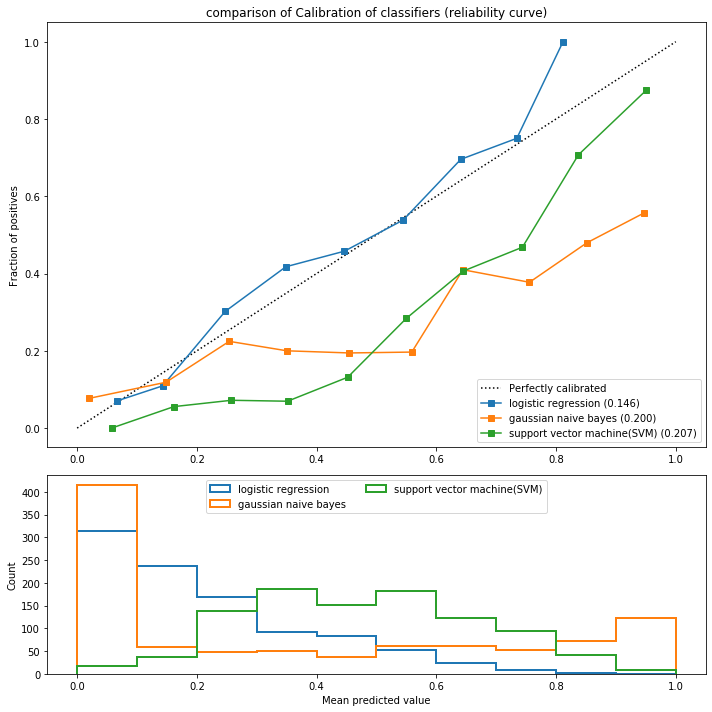

In [7]:
lr = LogisticRegression() 
gnb = GaussianNB()
svm = LinearSVC(max_iter=10000000)

model = [lr,gnb,svm]
name = ['logistic regression','gaussian naive bayes','support vector machine(SVM)']
for clf in model:
    clf.fit(X_train, y_train)

calibration_curve_plot(model,name,X_test,y_test,y1)    
    

# other calibration methods

now to improve the brier score of gaussian naive bayes and SVM we will use other calibration methods namely:

1-isotonic calibration

A- It is a non-parametric approach.

B- It makes no such strong assumptions and can deal with either shape, provided that there is sufficient calibration data.

C- isotonic calibration is preferable for non-sigmoid calibration curves and in situations where large amounts of data are available for calibration.

2-sigmoid calibration

A- It is a parametric approach.

B- It assumes a sigmoid rather than a transposed-sigmoid curve.

C- sigmoid calibration is preferable in cases where the calibration curve is sigmoid and where there is limited calibration data.

# isotonic calibration

By applying isotonic calibration following results are obtained:

1-since both GNB and SVM were not following sigmoid curve property both performed well with isotonic calibration.

2-the brier score values of both the classifiers lie very close to the Logistic regression(0.146) with the difference of 0.001 by GNB(0.145) and difference of 0.002 by SVM(0.144)  that is quite a improvement.

3-the histogram shows how close probability count prediction by all the three classifiers are there having an almost overlapping hist plot.



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


logistic regression:
	Brier: 0.146
gaussian naive bayes-isotonic:
	Brier: 0.145
support vector machine(SVM)-isotonic:
	Brier: 0.144


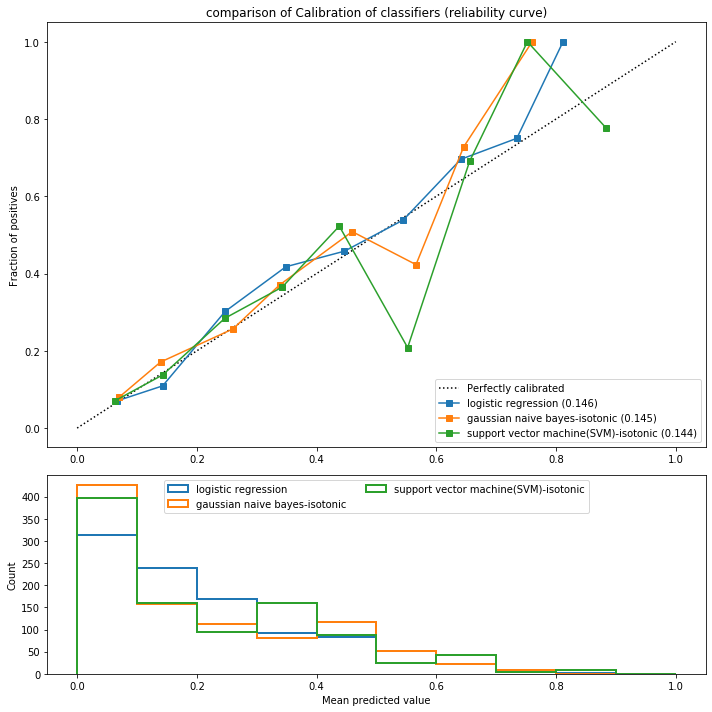

In [8]:
gnb1 = CalibratedClassifierCV(gnb, cv=2, method='isotonic')
svm1 = CalibratedClassifierCV(svm, cv=2, method='isotonic')

model1 = [lr,gnb1,svm1]

name1 = ['logistic regression','gaussian naive bayes-isotonic','support vector machine(SVM)-isotonic']

for clf in model1:
    clf.fit(X_train, y_train)

calibration_curve_plot(model1,name1,X_test,y_test,y1)    

# sigmoid calibration

By applying sigmoid calibration following results are obtained:

1-SVM gives same brier score of 0.144 with sigmoid calibration as well.

2-GNB brier score is better with the isotonic calibration because it is generally a over-confident classifier showing transposed sigmoid nature in the first plot(without isotonic and without sigmoid).




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


logistic regression:
	Brier: 0.146
gaussian naive bayes-sigmoid:
	Brier: 0.147
support vector machine(SVM)-sigmoid:
	Brier: 0.144


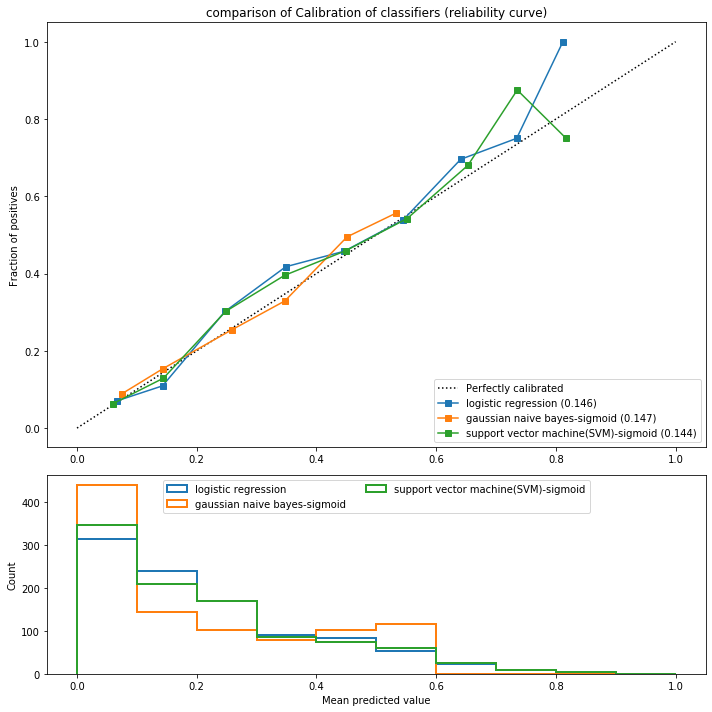

In [10]:
gnb2 = CalibratedClassifierCV(gnb, cv=2, method='sigmoid')
svm2 = CalibratedClassifierCV(svm, cv=2, method='sigmoid')

model2 = [lr,gnb2,svm2]

name2 = ['logistic regression','gaussian naive bayes-sigmoid','support vector machine(SVM)-sigmoid']

for clf in model2:
    clf.fit(X_train, y_train)

calibration_curve_plot(model2,name2,X_test,y_test,y1)    